In [36]:
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import matplotlib
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [13]:
df = pd.read_csv("data_b.csv")
df['diagnosis'] = df['diagnosis'].apply(lambda x : {'B':0,'M':1}[x])
df = df.drop('Unnamed: 32',axis=1)
#lets shuffle the rows
df1 = df.sample(frac=1).copy()
target = df1['diagnosis']
inputs = df1.drop(['diagnosis','id'],axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


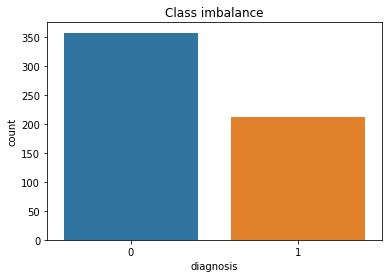

In [40]:
sns.countplot(x='diagnosis',data=df)
plt.title("Class imbalance")
plt.savefig('diagnosis histogram')

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       103
          1       0.97      0.93      0.95        68

avg / total       0.96      0.96      0.96       171

[[101   2]
 [  5  63]]


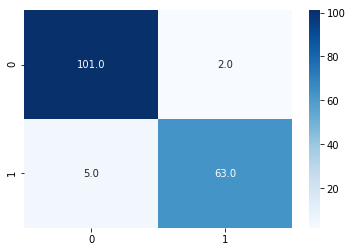

In [47]:
os = SMOTE(random_state=0)
X = inputs.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
columns = inputs.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['diagnosis'])
clf = linear_model.LogisticRegression()
clf.fit(os_data_X, os_data_y)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
#  = metrics.f1_score(y_test, predictions, average='micro') # mean average percentage error
print(classification_report(y_test,predictions))
print(cm)
sns.heatmap(cm,annot=True,fmt=".1f",cmap = 'Blues')
plt.savefig("Confusion Matrix")

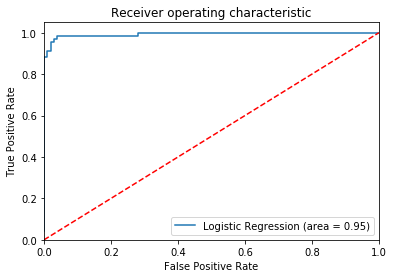

In [37]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()